# **Computational Drug Discovery Project: Regression Models with the Random Forest Algorithm**
By Mathew Kuruvilla

Based on the Drug Discovery Project taught by Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this project, I will be building a machine learning model using bioactivity data from ChEMBL for coronavirus replicase polyprotein 1ab inhibitors.
This Jupyter notebook will focus on building a regression models using the random forest algorithm for use with the prepared bioactivity data.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('coronavirus_replicase_polyprotein_1ab_data_2class_estate_fp.csv')

In [3]:
df

,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,EStateFP10,...,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.408935
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.677781
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.096910
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,7.397940
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.443697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,4.002177
1798,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,6.457175
1799,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,4.002177
1800,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,6.473661


## **3. Input features**
The ***coronavirus replicase polyprotein 1ab*** data set contains 79 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,EStateFP10,...,EStateFP70,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1798,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1799,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1800,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

0       6.408935
1       6.677781
2       7.096910
3       7.397940
4       6.443697
          ...   
1797    4.002177
1798    6.457175
1799    4.002177
1800    6.473661
1801    4.282929
Name: pIC50, Length: 1802, dtype: float64

### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(1802, 79)

In [7]:
Y.shape

(1802,)

### **3.4. Remove low variance features**

Low variance columns are those that have near constant values making them less useful for the model building. These features are dropped in this step.

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8))) # .8 * (1 - .8) = 0.16   
X = selection.fit_transform(X)

In [9]:
X.shape

(1802, 12)

## **4. Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
X_train.shape, Y_train.shape

((1441, 12), (1441,))

In [12]:
X_test.shape, Y_test.shape

((361, 12), (361,))

## **5. Building a Regression Model using Random Forest**

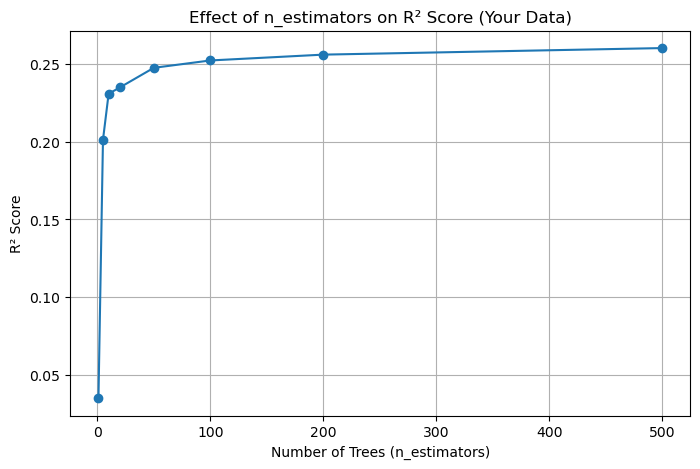

[0.035229863804045136, 0.2011284220391285, 0.23070107502878712, 0.23478577070185425, 0.24737030898005163, 0.2520952711326272, 0.25583874852395794, 0.2600468796634624]


In [13]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# List of tree counts you want to test
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 500]
r2_scores = []

for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=1)
    model.fit(X_train, Y_train)
    r2 = model.score(X_test, Y_test)
    r2_scores.append(r2)

# Now plot
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, r2_scores, marker='o')
plt.title('Effect of n_estimators on R² Score (Your Data)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()
print(r2_scores)

In [14]:
Y_pred = model.predict(X_test)
Y_pred

array([6.50116802, 6.44840572, 5.39932155, 5.76657228, 5.74493239,
       4.97643377, 7.57558559, 4.97643377, 5.29776233, 4.63321785,
       6.08962245, 6.35137773, 6.1897093 , 6.95795479, 6.40450664,
       4.4193703 , 6.01342583, 6.01717045, 5.09366695, 4.12025292,
       5.51200751, 6.26016818, 7.42212145, 5.51537969, 6.50843557,
       4.89827655, 6.36089131, 6.36094476, 6.96754897, 7.03527858,
       4.4193703 , 6.071474  , 5.77989131, 6.58207012, 6.26016818,
       6.36094476, 6.43018199, 5.29873266, 6.3876097 , 6.50843557,
       4.26847008, 5.09366695, 5.76657228, 6.43595164, 6.56975967,
       4.40216006, 6.62485596, 6.40450664, 4.97643377, 5.03859336,
       6.09469207, 6.01342583, 4.39775098, 6.44501972, 6.22783428,
       6.25993228, 6.01342583, 5.09366695, 5.69236408, 6.95795479,
       6.01342583, 6.96754897, 5.09366695, 6.59526105, 5.29776233,
       5.03218465, 5.29776233, 6.01342583, 7.42212145, 5.03959611,
       5.39932155, 6.95795479, 5.87337068, 6.01507831, 4.97643

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

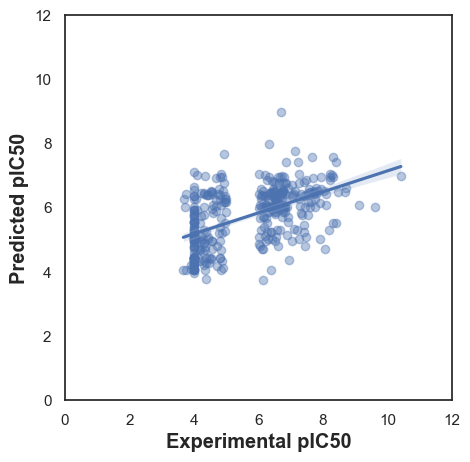

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show